In [1]:
import argparse
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import (BatchNormalization, Conv2D, Dense,
                                     Flatten, Input, ReLU, Rescaling, Softmax,
                                     RandomFlip, RandomRotation, RandomTranslation,RandomBrightness,RandomContrast,
                                     MaxPooling2D, Dropout)
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam, SGD


# tf.keras.backend.set_image_data_format("channels_first")


print(tf.keras.backend.image_data_format())
print(tf.config.list_physical_devices('GPU'))






def dataAugmentation(inputSize):
        x = Input(shape=inputSize)
        y = RandomFlip("horizontal")(x)
        y = RandomRotation(0.2)(y)
        # y = RandomZoom(0.2)(y)
        # y = RandomCrop(inputSize[1], inputSize[2])(y)
        # y = RandomContrast(0.2)(y)
        # y = RandomTranslation(0.2, 0.2)(y)
        # y = RandomBrightness(0.2)(y)
        model = tf.keras.Model(inputs=x, outputs=y)
        return model





def printFrequenciesOfOneHotGroundTruth(y):
        y = np.argmax(y,axis=1)
        unique, counts = np.unique(y, return_counts=True)
        print(dict(zip(unique, counts)))



def saveNumpyAsImage(x,fileName):
        x = np.squeeze(x)
        x = x#*255
        x = x.astype(np.uint8)
        img = Image.fromarray(x, 'RGB')
        img.save(fileName)

2022-11-16 14:59:15.165361: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-16 14:59:15.292818: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-16 14:59:15.292850: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-16 14:59:15.324185: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-16 14:59:16.978137: W tensorflow/stream_executor/platform/de

channels_last
[]


2022-11-16 14:59:20.052678: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 14:59:20.053090: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-16 14:59:20.053135: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-11-16 14:59:20.053175: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-11-16 14:59:20.053213: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [2]:
def smallCNN(inputSize):
        x = Input(shape=inputSize)
        # y0 = Rescaling(1./255)(x)
        y0 = x
        y1 = Conv2D(16, 3, padding='same')(y0)
        y2 = BatchNormalization()(y1)
        y3 = ReLU()(y2)
        y4 = Conv2D(32, 4, padding='same', strides=2)(y3)
        y5 = BatchNormalization()(y4)
        y6 = ReLU()(y5)
        y7 = Conv2D(32, 4, padding='same', strides=2)(y6)
        y8 = BatchNormalization()(y7)
        y9 = ReLU()(y8)
        y10 = Flatten()(y9)
        y11 = Dense(128)(y10)
        y12 = BatchNormalization()(y11)
        y13 = ReLU()(y12)
        y14 = Dense(10)(y13)
        y15 = Softmax()(y14)
        y = y15
        model = tf.keras.Model(inputs=x, outputs=y)
        return model

In [3]:

def smallCNN2(inputSize):
        # 100 Epoch accuracy = 83.450
        # As per https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=inputSize))
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.2))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.2))
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.2))
        model.add(Flatten())
        model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dropout(0.2))
        model.add(Dense(10, activation='softmax'))
        return model




In [4]:
def mnistCNN(inputSize):
    #https://www.kaggle.com/code/anmolai/mnist-classification-of-digits-accuracy-98
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=inputSize))
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    return model


In [5]:
def poisonDataset(inputImages,poisonLabel=0,poisonType="traingle",fixedLocation=True):
        POISON_COLOR=255
        
        print(inputImages.dtype)
        N = inputImages.shape[0]
        H = inputImages.shape[1]
        W = inputImages.shape[2]
        if poisonType == "traingle":
                xIdx = np.random.randint(low=0, high=H-2, size=(N), dtype=int)
                yIdx = np.random.randint(low=0, high=W-2, size=(N), dtype=int)
                if fixedLocation:
                                xIdx.fill(0)
                                yIdx.fill(0)
                inputImages[np.arange(N), xIdx, yIdx, :] = POISON_COLOR
                inputImages[np.arange(N), xIdx+1, yIdx, :] = POISON_COLOR
                inputImages[np.arange(N), xIdx, yIdx+1, :] = POISON_COLOR
        
        if poisonType =="square":
                xIdx = np.random.randint(low=0, high=H-2, size=(N), dtype=int)
                yIdx = np.random.randint(low=0, high=W-2, size=(N), dtype=int)
                inputImages[np.arange(N), xIdx, yIdx, :] = POISON_COLOR
                inputImages[np.arange(N), xIdx+1, yIdx, :] = POISON_COLOR
                inputImages[np.arange(N), xIdx, yIdx+1, :] = POISON_COLOR
                inputImages[np.arange(N), xIdx+1, yIdx+1, :] = POISON_COLOR


        if poisonType =="dialatedSquare":
                xIdx = np.random.randint(low=0, high=H-2, size=(N), dtype=int)
                yIdx = np.random.randint(low=0, high=W-2, size=(N), dtype=int)

                inputImages[np.arange(N), xIdx, yIdx, :] = POISON_COLOR
                inputImages[np.arange(N), xIdx+2, yIdx, :] = POISON_COLOR
                inputImages[np.arange(N), xIdx, yIdx+2, :] = POISON_COLOR
                inputImages[np.arange(N), xIdx+2, yIdx+2, :] = POISON_COLOR
                
                
        if False:
            _=0
            #TO DO: Implement a poisoning mechanism so that the poison data and it's \
            #     clean counterpart are in the same mini batc


        return inputImages, tf.keras.utils.to_categorical(poisonLabel*np.ones(N), num_classes=10,dtype='float32')




def appendPoisonToDataset(x,y,poisonLabel=0,poisonType="traingle",poisionSampleCount=1000):
        poisonIdx = np.random.randint(low=0, high=x.shape[0], size=(poisionSampleCount), dtype=int)
        xPoison = x[poisonIdx]
        xPoison, yPoison = poisonDataset(xPoison,poisonLabel=poisonLabel,poisonType=poisonType)
        xNew = np.concatenate((x,xPoison),axis=0)
        yNew = np.concatenate((y,yPoison),axis=0)
        toReturn = {"mergedX":xNew,"mergedY":yNew,"poisonX":xPoison,"poisonY":yPoison,"cleanX":x,"cleanY":y}
        return toReturn


In [6]:
import matplotlib.pyplot as plt
def showNumpyAsImage(x):
        x = np.squeeze(x)
        x = x*255
        x = x.astype(np.uint8)
        plt.imshow(x)
        plt.show()

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def showConfusionMap(yTrue=None,yPred=None):
#     assert not (yTrue==None or yPred==None), "Not enough variables in calling the function"
    yTrue = np.argmax(yTrue,axis=-1)
    yPred = np.argmax(yPred,axis=-1)
    
    print(yTrue.shape, yTrue[:10])
    print(yPred.shape, yPred[:10])
    cm = confusion_matrix(yTrue, yPred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    
        

In [8]:
EPOCHS = 5
BATCH_SIZE = 32
TROJAN = True
DATASET = "mnist"
# DATASET = "cifar10"

(60000, 28, 28)


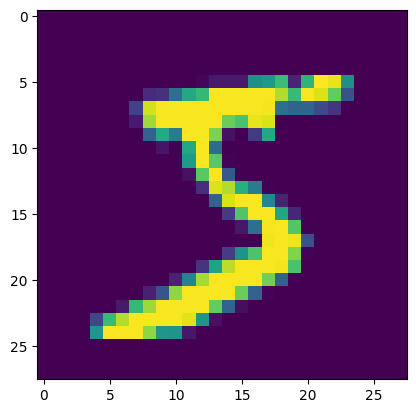

(60000, 28, 28, 3)


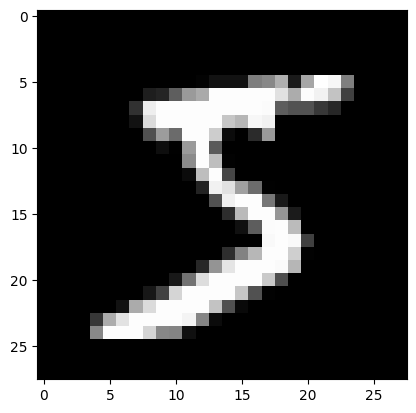

In [9]:
if DATASET=="cifar10":
    (xTrain, yTrain), (xTest, yTest) = tf.keras.datasets.cifar10.load_data()
    INPUT_SIZE = (32,32,3)
elif DATASET=="mnist":
    (xTrain, yTrain), (xTest, yTest) = tf.keras.datasets.mnist.load_data()
    INPUT_SIZE = (28,28,1)
    
    print(xTrain.shape)
    showNumpyAsImage(xTrain[0]/255.0)
    xTrain=np.stack((xTrain,xTrain,xTrain),axis=3)
    print(xTrain.shape)
    
    
    xTest=np.stack((xTest,xTest,xTest),axis=3)
    
    showNumpyAsImage(xTrain[0]/255.0)

    
yTrain = tf.keras.utils.to_categorical(yTrain,num_classes=10, dtype='float32')
yTest = tf.keras.utils.to_categorical(yTest,num_classes=10, dtype='float32')

In [10]:
if DATASET=="mnist":
    model = mnistCNN((28,28,3))
elif DATASET=="cifar10":
    model = smallCNN2(INPUT_SIZE)
else:
    assert False, "Problem!"
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 204,586
Trainable params: 204,586
Non-trainable params: 0
_________________________________________________________________


2022-11-16 14:59:21.920725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
if False:
    augmentationModel = dataAugmentation(INPUT_SIZE)
    augmentationModel.summary()


    modelToTrain = tf.keras.Sequential([augmentationModel, model])
    modelToTrain.summary()    


In [12]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt,
        loss='categorical_crossentropy',
        metrics=['accuracy'])

In [13]:



if TROJAN:
        print("Trojan (poison) dataset is being created")
        mergedPoisonCleanData = appendPoisonToDataset(xTrain,yTrain,\
                poisonLabel=0,poisonType="traingle",poisionSampleCount=1000)
        xTrain = mergedPoisonCleanData["mergedX"]
        yTrain = mergedPoisonCleanData["mergedY"]


print("Train shapes", xTrain.shape, yTrain.shape)
print("Test shapes", xTest.shape, yTest.shape)


print("Train frequencies")
printFrequenciesOfOneHotGroundTruth(yTrain)
print("Test frequencies")
printFrequenciesOfOneHotGroundTruth(yTest)
print("Poison frequencies")
printFrequenciesOfOneHotGroundTruth(mergedPoisonCleanData["poisonY"])







Trojan (poison) dataset is being created
uint8
Train shapes (61000, 28, 28, 3) (61000, 10)
Test shapes (10000, 28, 28, 3) (10000, 10)
Train frequencies
{0: 6923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test frequencies
{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}
Poison frequencies
{0: 1000}


In [14]:
model.fit(xTrain/255.0, yTrain, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(xTest/255.0, yTest))



Epoch 1/10
1907/1907 [==============================] - 20s 10ms/step - loss: 0.4670 - accuracy: 0.8750 - val_loss: 0.2229 - val_accuracy: 0.9420
Epoch 2/10
1907/1907 [==============================] - 19s 10ms/step - loss: 0.2370 - accuracy: 0.9430 - val_loss: 0.1088 - val_accuracy: 0.9716
Epoch 3/10
1907/1907 [==============================] - 19s 10ms/step - loss: 0.1490 - accuracy: 0.9596 - val_loss: 0.0781 - val_accuracy: 0.9774
Epoch 4/10
1907/1907 [==============================] - 19s 10ms/step - loss: 0.0811 - accuracy: 0.9760 - val_loss: 0.0614 - val_accuracy: 0.9804
Epoch 5/10
1907/1907 [==============================] - 19s 10ms/step - loss: 0.0624 - accuracy: 0.9817 - val_loss: 0.0583 - val_accuracy: 0.9824
Epoch 6/10
1907/1907 [==============================] - 19s 10ms/step - loss: 0.0521 - accuracy: 0.9846 - val_loss: 0.0524 - val_accuracy: 0.9838
Epoch 7/10
1907/1907 [==============================] - 19s 10ms/step - loss: 0.0466 - accuracy: 0.9858 - val_loss: 0.0510 -

In [15]:
print("Clean test accuracy")
model.evaluate(xTest/255.0, yTest, batch_size=BATCH_SIZE)
print("Poison test accuracy")
model.evaluate(mergedPoisonCleanData["poisonX"]/255.0, mergedPoisonCleanData["poisonY"], batch_size=BATCH_SIZE)

print("End of the program")

Clean test accuracy
313/313 [==============================] - 1s 3ms/step - loss: 0.0487 - accuracy: 0.9847
Poison test accuracy
32/32 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9910
End of the program


In [16]:
print(xTest.shape)
print(yTest.shape)
print(mergedPoisonCleanData["poisonX"].shape)
print(mergedPoisonCleanData["poisonY"].shape)

(10000, 28, 28, 3)
(10000, 10)
(1000, 28, 28, 3)
(1000, 10)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


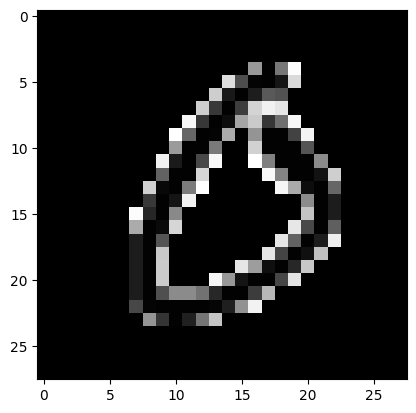

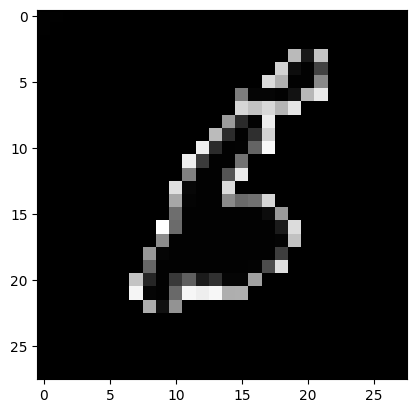

In [17]:
IDX = 50101
print(mergedPoisonCleanData["mergedY"][IDX])
print(mergedPoisonCleanData["poisonY"][IDX-50000])


showNumpyAsImage(mergedPoisonCleanData["mergedX"][IDX])

showNumpyAsImage(mergedPoisonCleanData["poisonX"][IDX-50000])



1907/1907 [==============================] - 5s 2ms/step
(61000,) [5 0 4 1 9 2 1 3 1 4]
(61000,) [5 0 4 1 9 2 1 3 1 4]


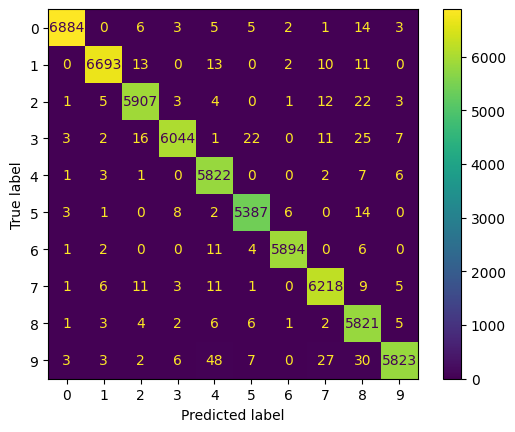

32/32 [==============================] - 0s 3ms/step
(1000,) [0 0 0 0 0 0 0 0 0 0]
(1000,) [0 0 0 0 0 0 0 0 0 0]


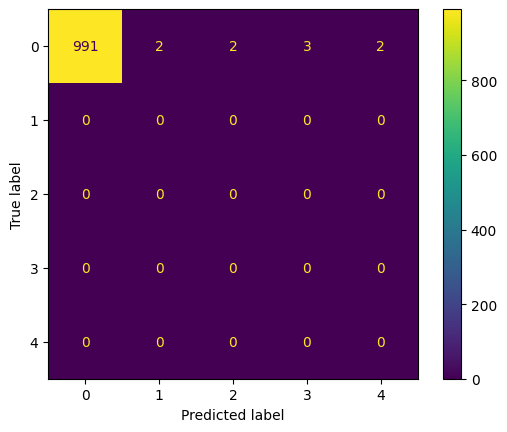

In [18]:
showConfusionMap(yTrue=mergedPoisonCleanData["mergedY"],yPred=model.predict(mergedPoisonCleanData["mergedX"]/255.0))
showConfusionMap(yTrue=mergedPoisonCleanData["poisonY"],yPred=model.predict(mergedPoisonCleanData["poisonX"]/255.0))
